# Feature Matching


In [1]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

In [2]:
building_image = cv.imread('building.jpg',0)
flipped_building_image = cv.imread('flipped_building.jpg',0)

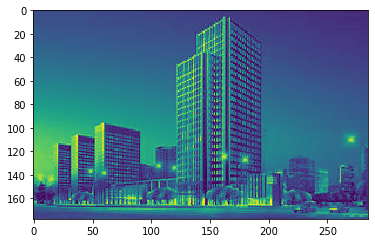

In [3]:
plt.imshow(building_image)

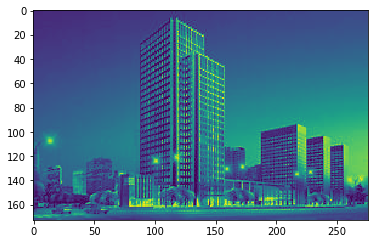

In [4]:
plt.imshow(flipped_building_image)

## Brute Force Matcher

In [5]:
orb = cv.ORB_create()

kp1, des1 = orb.detectAndCompute(building_image,None)
kp2, des2 = orb.detectAndCompute(flipped_building_image,None)

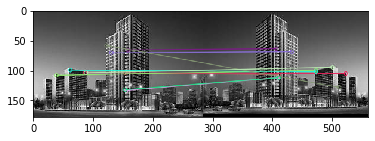

(<matplotlib.image.AxesImage at 0x1e634283c08>, None)

In [6]:
bf = cv.BFMatcher(cv.NORM_HAMMING,crossCheck = True)

matches = bf.match(des1,des2)

matches = sorted(matches, key = lambda x:x.distance)

matching_image_bf = cv.drawMatches(building_image,kp1,flipped_building_image,kp2,matches[:10],None,flags=cv.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
plt.imshow(matching_image_bf),plt.show()

In [7]:
cv.imwrite('bfmatcher.png',matching_image_bf)

True

## FLANN Based Matcher

In [8]:
sift = cv.SIFT_create()

kp1, des1 = sift.detectAndCompute(building_image,None)
kp2, des2 = sift.detectAndCompute(flipped_building_image,None)

In [9]:
FLANN_INDEX_KDTREE = 1
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
search_params = dict(checks=50)   
flann = cv.FlannBasedMatcher(index_params,search_params)

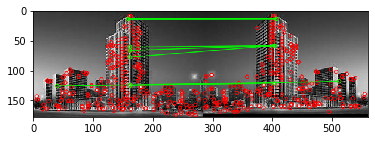

(<matplotlib.image.AxesImage at 0x1e6345e8648>, None)

In [10]:
matches = flann.knnMatch(des1,des2,k=2)

matchesMask = [[0,0] for i in range(len(matches))]

for i,(m,n) in enumerate(matches):
    if m.distance < 0.7*n.distance:
        matchesMask[i]=[1,0]
draw_params = dict(matchColor = (0,255,0),
                   singlePointColor = (255,0,0),
                   matchesMask = matchesMask,
                   flags = cv.DrawMatchesFlags_DEFAULT)

matching_image_flann = cv.drawMatchesKnn(building_image,kp1,flipped_building_image,kp2,matches,None,**draw_params)
plt.imshow(matching_image_flann,),plt.show()

In [11]:
cv.imwrite('flannmatcher.png',matching_image_flann)

True